# 1. DATA확인


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv("../input/dacon-basic-calls/train.csv")
test = pd.read_csv("../input/dacon-basic-calls/test.csv")

train

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [2]:
test


,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
2,TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
3,TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
4,TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,TEST_12938,322,1,282.4,202,89.9,270.2,321,32.80,293.6,321,8.88,2
12939,TEST_12939,222,0,233.5,209,34.6,234.0,92,23.22,224.4,202,9.63,2
12940,TEST_12940,98,29,223.4,209,29.3,223.9,203,28.82,230.0,208,22.26,2
12941,TEST_12941,23,30,241.3,222,24.7,234.3,93,22.23,223.1,33,9.93,0


In [3]:
# 영어로 변경
train = train.rename(columns={'ID': 'ID', '가입일': 'signup_date', '음성사서함이용': 'voice_mail', '주간통화시간': 'day_minutes', '주간통화횟수': 'day_calls', '주간통화요금': 'day_charge', '저녁통화시간': 'eve_minutes', '저녁통화횟수': 'eve_calls', '저녁통화요금': 'eve_charge', '밤통화시간': 'night_minutes', '밤통화횟수': 'night_calls', '밤통화요금': 'night_charge', '상담전화건수': 'customer_calls', '전화해지여부': 'churn'})
test = test.rename(columns={'ID': 'ID', '가입일': 'signup_date', '음성사서함이용': 'voice_mail', '주간통화시간': 'day_minutes', '주간통화횟수': 'day_calls', '주간통화요금': 'day_charge', '저녁통화시간': 'eve_minutes', '저녁통화횟수': 'eve_calls', '저녁통화요금': 'eve_charge', '밤통화시간': 'night_minutes', '밤통화횟수': 'night_calls', '밤통화요금': 'night_charge', '상담전화건수': 'customer_calls'})

# 2. Class imbalance


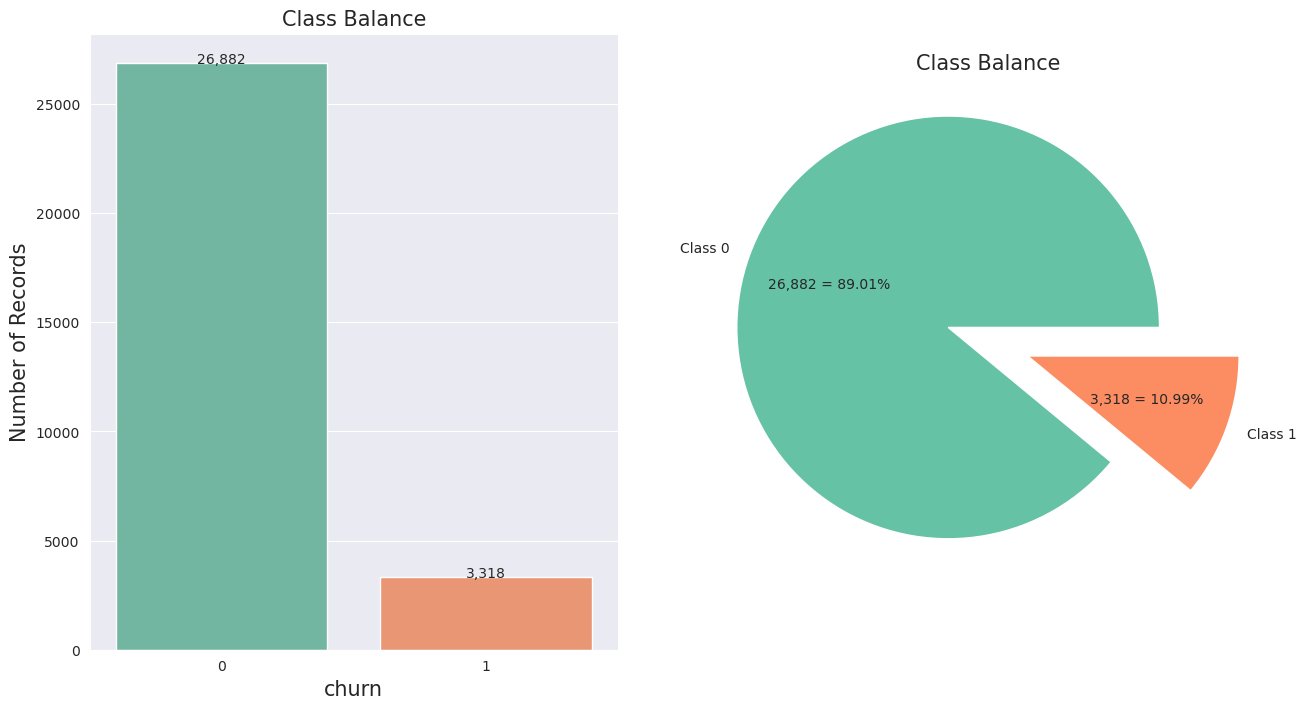

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.set_style('darkgrid')
sns.set_palette('Set2')

counts = pd.DataFrame(train["churn"].value_counts())
_ = sns.barplot(x=counts.index, y=counts.churn, ax=axs[0])
for p in axs[0].patches:
    axs[0].text(x=p.get_x()+(p.get_width()/2), y=p.get_height(), s="{:,d}".format(round(p.get_height())), ha="center")
_ = axs[0].set_title("Class Balance", fontsize=15)
_ = axs[0].set_ylabel("Number of Records", fontsize=15)
_ = axs[0].set_xlabel("churn", fontsize=15)

data = [
    train[(train["churn"] == 0)]["ID"].count(),
    train[(train["churn"] == 1)]["ID"].count(),
]
_ = axs[1].pie(
    data, labels=["Class 0", "Class 1"],
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.20] * len(data), 
    colors=sns.color_palette("Set2")[0:len(data)],
)
_ = axs[1].set_title("Class Balance", fontsize=15)

# 

# 3. 결측치 확인

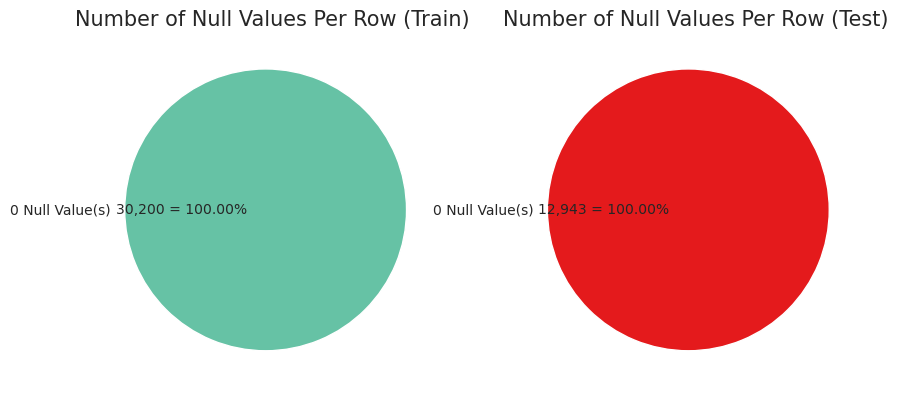

In [11]:
train["null_count"] = train.isnull().sum(axis=1)
counts = train.groupby("null_count")["ID"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

axs = axs.flatten()

_ = axs[0].pie(
    x=list(null_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_data.values())/100, x),
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    colors=sns.color_palette("Set2")[0:3],
)
_ = axs[0].set_title("Number of Null Values Per Row (Train)", fontsize=15)

test["null_count"] = test.isnull().sum(axis=1)
counts = test.groupby("null_count")["ID"].count().to_dict()
null_data = {"{} Null Value(s)".format(k) : v for k, v in counts.items() if k < 8}

_ = axs[1].pie(
    x=list(null_data.values()), 
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(null_data.values())/100, x),
    explode=[0.05] * len(null_data.keys()), 
    labels=null_data.keys(), 
    colors=sns.color_palette("Set1")[0:3],
)
_ = axs[1].set_title("Number of Null Values Per Row (Test)", fontsize=15)

train = train.drop("null_count", axis=1)
test = test.drop("null_count", axis=1)

# 4. train / test 차이 비교

-------> Fold 1 <--------
: AUC ROC = 0.4983445946810117
-------> Fold 2 <--------
: AUC ROC = 0.4977852682899378
-------> Fold 3 <--------
: AUC ROC = 0.49992380524838914
-------> Fold 4 <--------
: AUC ROC = 0.4961080560303797
-------> Fold 5 <--------
: AUC ROC = 0.4984628814088457
--> Overall results for out of fold predictions
: AUC ROC = 0.4968482093928907


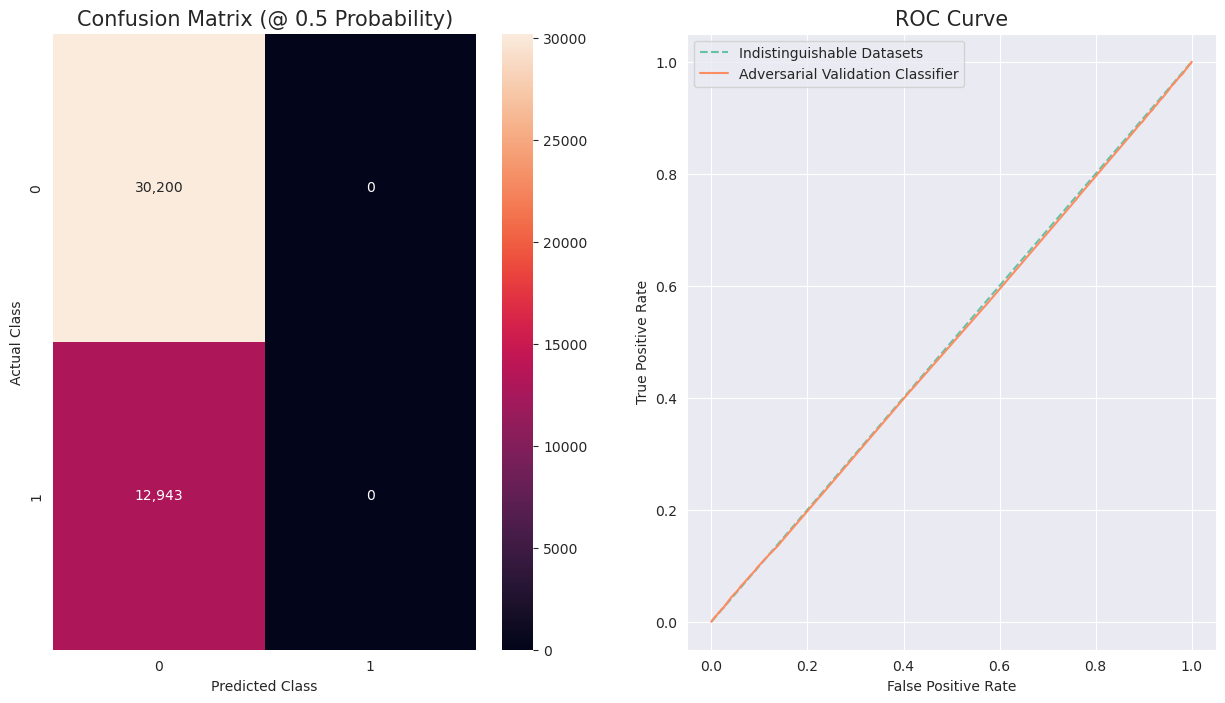

In [12]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
from lightgbm import early_stopping, log_evaluation
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import roc_curve

train["origin"] = 0
test["origin"] = 1

combined = train.copy()
combined = pd.concat([combined, test]).reset_index(drop=True)

features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls'
]

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=2023, shuffle=True)
train_oof_preds = np.zeros((combined.shape[0],))
train_oof_probas = np.zeros((combined.shape[0],))

for fold, (train_index, test_index) in enumerate(skf.split(combined, combined["origin"])):
    print("-------> Fold {} <--------".format(fold + 1))
    x_train, x_valid = pd.DataFrame(combined.iloc[train_index]), pd.DataFrame(combined.iloc[test_index])
    y_train, y_valid = combined["origin"].iloc[train_index], combined["origin"].iloc[test_index]
    
    x_train_features = pd.DataFrame(x_train[features])
    x_valid_features = pd.DataFrame(x_valid[features])

    model = LGBMClassifier(
        random_state=2023,
        objective="binary",
        metric="auc",
        n_jobs=-1,
        n_estimators=2000,
        verbose=-1,  
        max_depth=3,
    )
    model.fit(
        x_train_features[features], 
        y_train,
        eval_set=[(x_valid_features[features], y_valid)],
        callbacks=[
            early_stopping(50, verbose=False),
            log_evaluation(2000),
        ]
    )
    oof_preds = model.predict(x_valid_features[features])
    oof_probas = model.predict_proba(x_valid_features[features])[:,1]
    train_oof_preds[test_index] = oof_preds
    train_oof_probas[test_index] = oof_probas
    print(": AUC ROC = {}".format(roc_auc_score(y_valid, oof_probas)))
    
auc_vanilla = roc_auc_score(combined["origin"], train_oof_probas)
fpr, tpr, _ = roc_curve(combined["origin"], train_oof_probas)
print("--> Overall results for out of fold predictions")
print(": AUC ROC = {}".format(auc_vanilla))

confusion = confusion_matrix(combined["origin"], train_oof_preds)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

_ = sns.heatmap(confusion, annot=True, fmt=",d", ax=axs[0])
_ = axs[0].set_title("Confusion Matrix (@ 0.5 Probability)", fontsize=15)
_ = axs[0].set_ylabel("Actual Class")
_ = axs[0].set_xlabel("Predicted Class")

_ = sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets", ax=axs[1])
_ = sns.lineplot(x=fpr, y=tpr, ax=axs[1], label="Adversarial Validation Classifier")
_ = axs[1].set_title("ROC Curve", fontsize=15)
_ = axs[1].set_xlabel("False Positive Rate")
_ = axs[1].set_ylabel("True Positive Rate")

Adversarial validation을 통해 학습된 분류기의 ROC AUC 점수는 0.497로, 데이터셋과 테스트 데이터셋이 매우 유사하다는 것을 나타냄.

# 5. sb

In [13]:
cont_features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls'
]

train[cont_features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
voice_mail,30200.000000,12.037815,24.925334,0.000000,0.000000,1.000000,22.000000,1112.000000
day_minutes,30200.000000,250.563457,84.403350,0.000000,222.800000,234.000000,289.600000,481.900000
day_calls,30200.000000,159.175728,101.573057,0.000000,88.000000,117.500000,223.000000,489.000000
day_charge,30200.000000,41.091447,23.179017,0.000000,24.400000,30.800000,45.900000,118.600000
eve_minutes,30200.000000,263.247215,74.064922,0.100000,223.700000,243.000000,290.300000,481.600000
eve_calls,30200.000000,158.474536,102.200293,0.000000,87.000000,112.000000,223.000000,489.000000
eve_charge,30200.000000,25.394260,8.146126,0.000000,22.220000,23.320000,28.820000,49.980000
night_minutes,30200.000000,263.438285,73.778416,20.800000,223.700000,242.800000,290.500000,481.800000
night_calls,30200.000000,157.047417,101.721601,20.000000,87.000000,108.000000,222.000000,490.000000
night_charge,30200.000000,12.074648,9.414261,1.040000,4.700000,9.080000,20.290000,44.980000


In [14]:
test[cont_features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
voice_mail,12943.000000,12.312756,28.069438,0.000000,0.000000,1.000000,22.000000,1112.000000
day_minutes,12943.000000,251.066221,85.236623,0.200000,222.700000,234.000000,289.800000,481.800000
day_calls,12943.000000,159.761724,103.648878,0.000000,88.000000,115.000000,223.000000,489.000000
day_charge,12943.000000,40.887059,23.062830,0.100000,24.400000,30.800000,45.900000,118.100000
eve_minutes,12943.000000,263.656424,75.232035,0.200000,223.800000,242.700000,290.350000,481.500000
eve_calls,12943.000000,159.628216,103.417132,0.000000,87.000000,113.000000,223.000000,490.000000
eve_charge,12943.000000,25.440460,8.288719,0.000000,22.220000,23.300000,28.820000,49.990000
night_minutes,12943.000000,264.052963,74.877379,21.300000,223.700000,242.800000,290.700000,481.700000
night_calls,12943.000000,157.692112,101.640429,20.000000,86.000000,111.000000,223.000000,489.000000
night_charge,12943.000000,12.095035,9.459368,2.000000,4.880000,9.060000,20.290000,44.980000


# 6. Spearman 상관관계분석

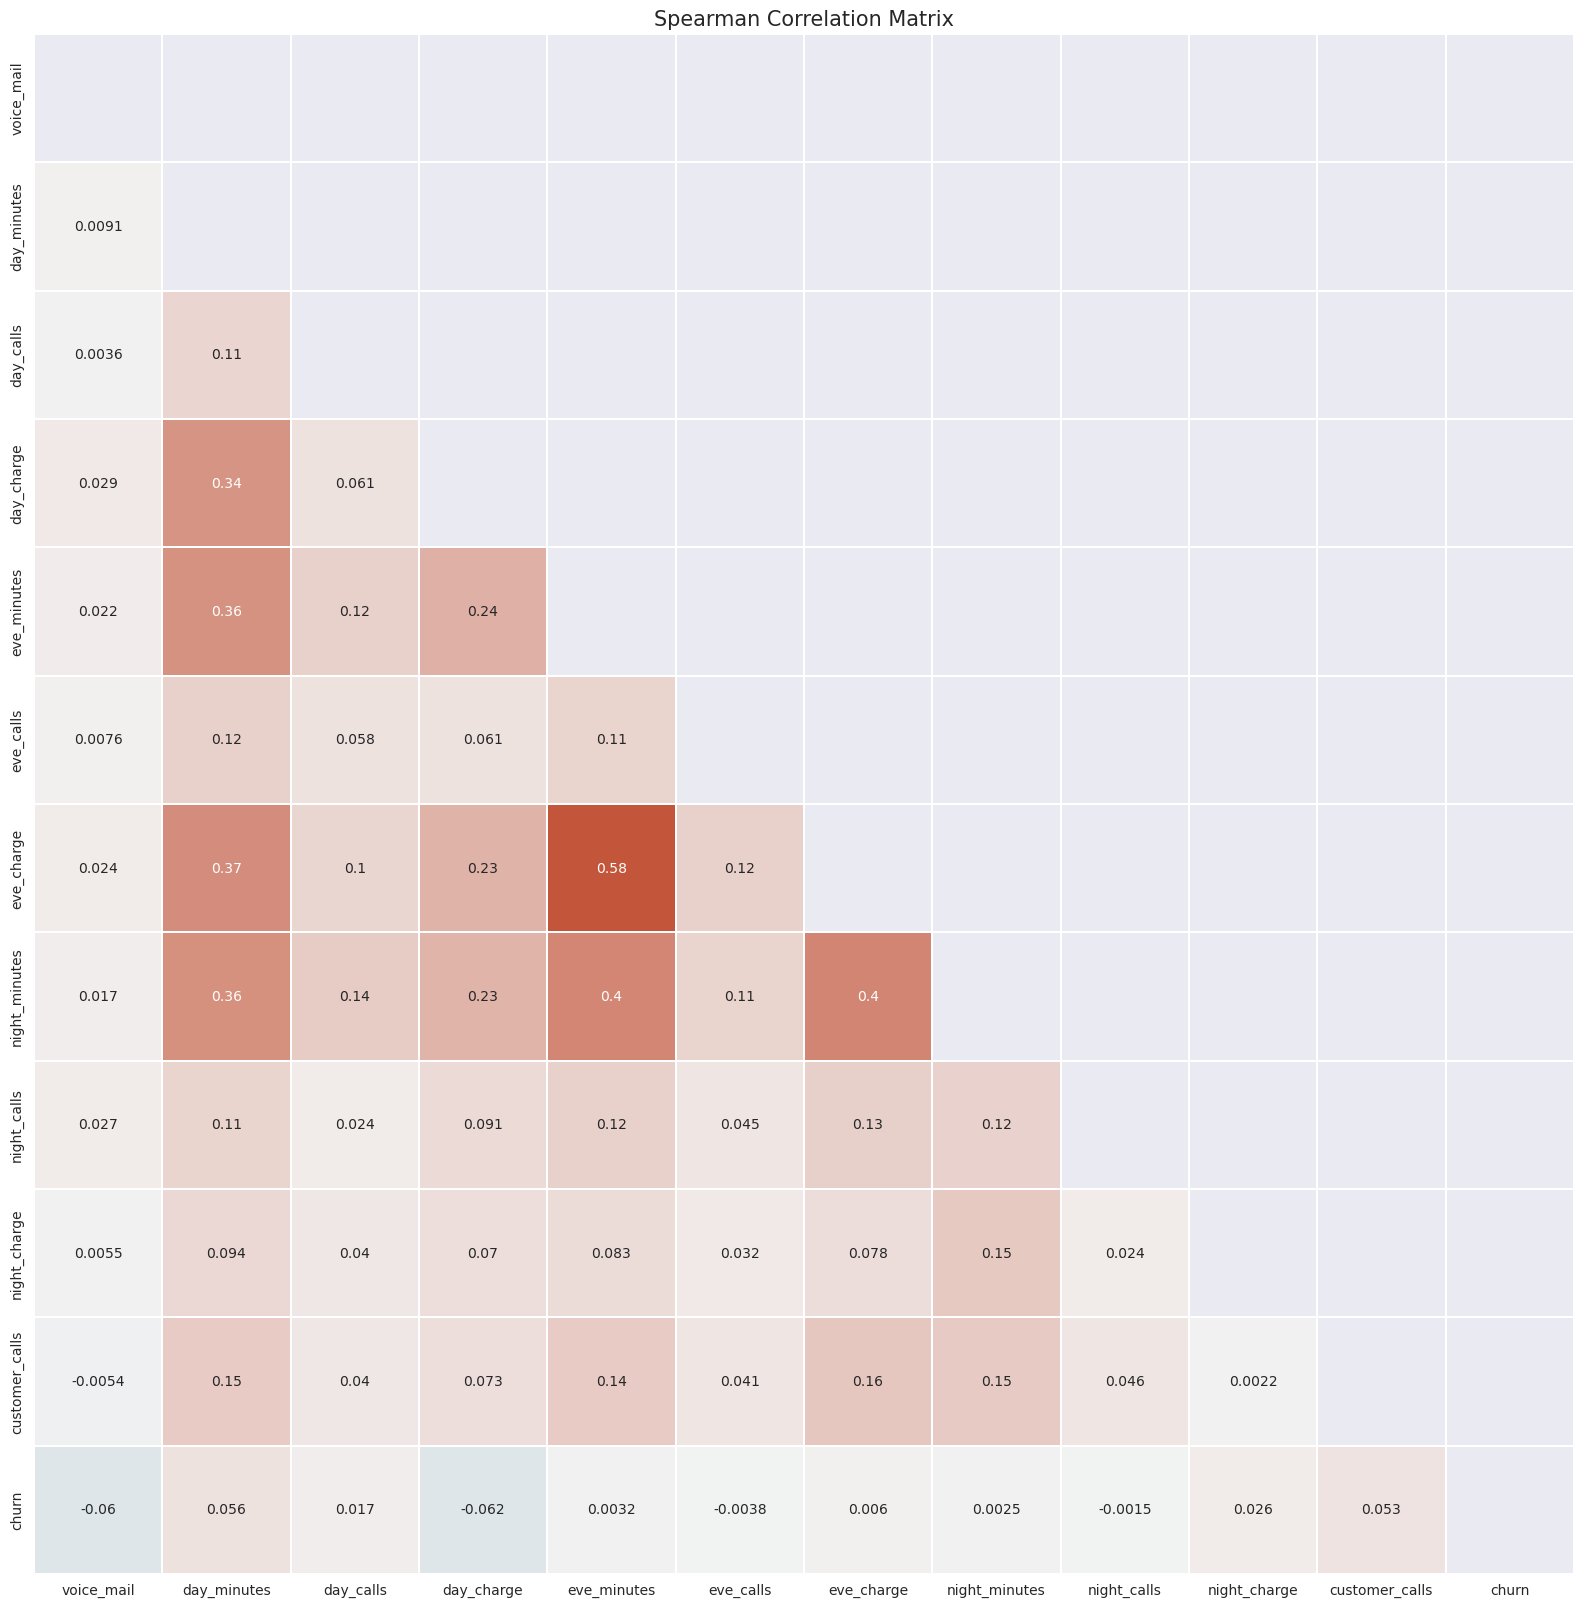

In [16]:
features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls', 'churn'
]

correlation_matrix = train[features].corr(method="spearman")

from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Spearman Correlation Matrix", fontsize=15)

# P-Value

In [17]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls'
]

x = add_constant(train[features])
model = OLS(train["churn"], x).fit()

pvalues = pd.DataFrame(model.pvalues)
pvalues.reset_index(inplace=True)
pvalues.rename(columns={0: "pvalue", "index": "feature"}, inplace=True)
pvalues.style.background_gradient(cmap='YlOrRd')

,feature,pvalue
0,const,0.000000
1,voice_mail,0.000000
2,day_minutes,0.000000
3,day_calls,0.037850
4,day_charge,0.000000
5,eve_minutes,0.327356
6,eve_calls,0.210668
7,eve_charge,0.925990
8,night_minutes,0.001450
9,night_calls,0.800392


#  UMAP (Uniform Manifold Approximation and Projection)

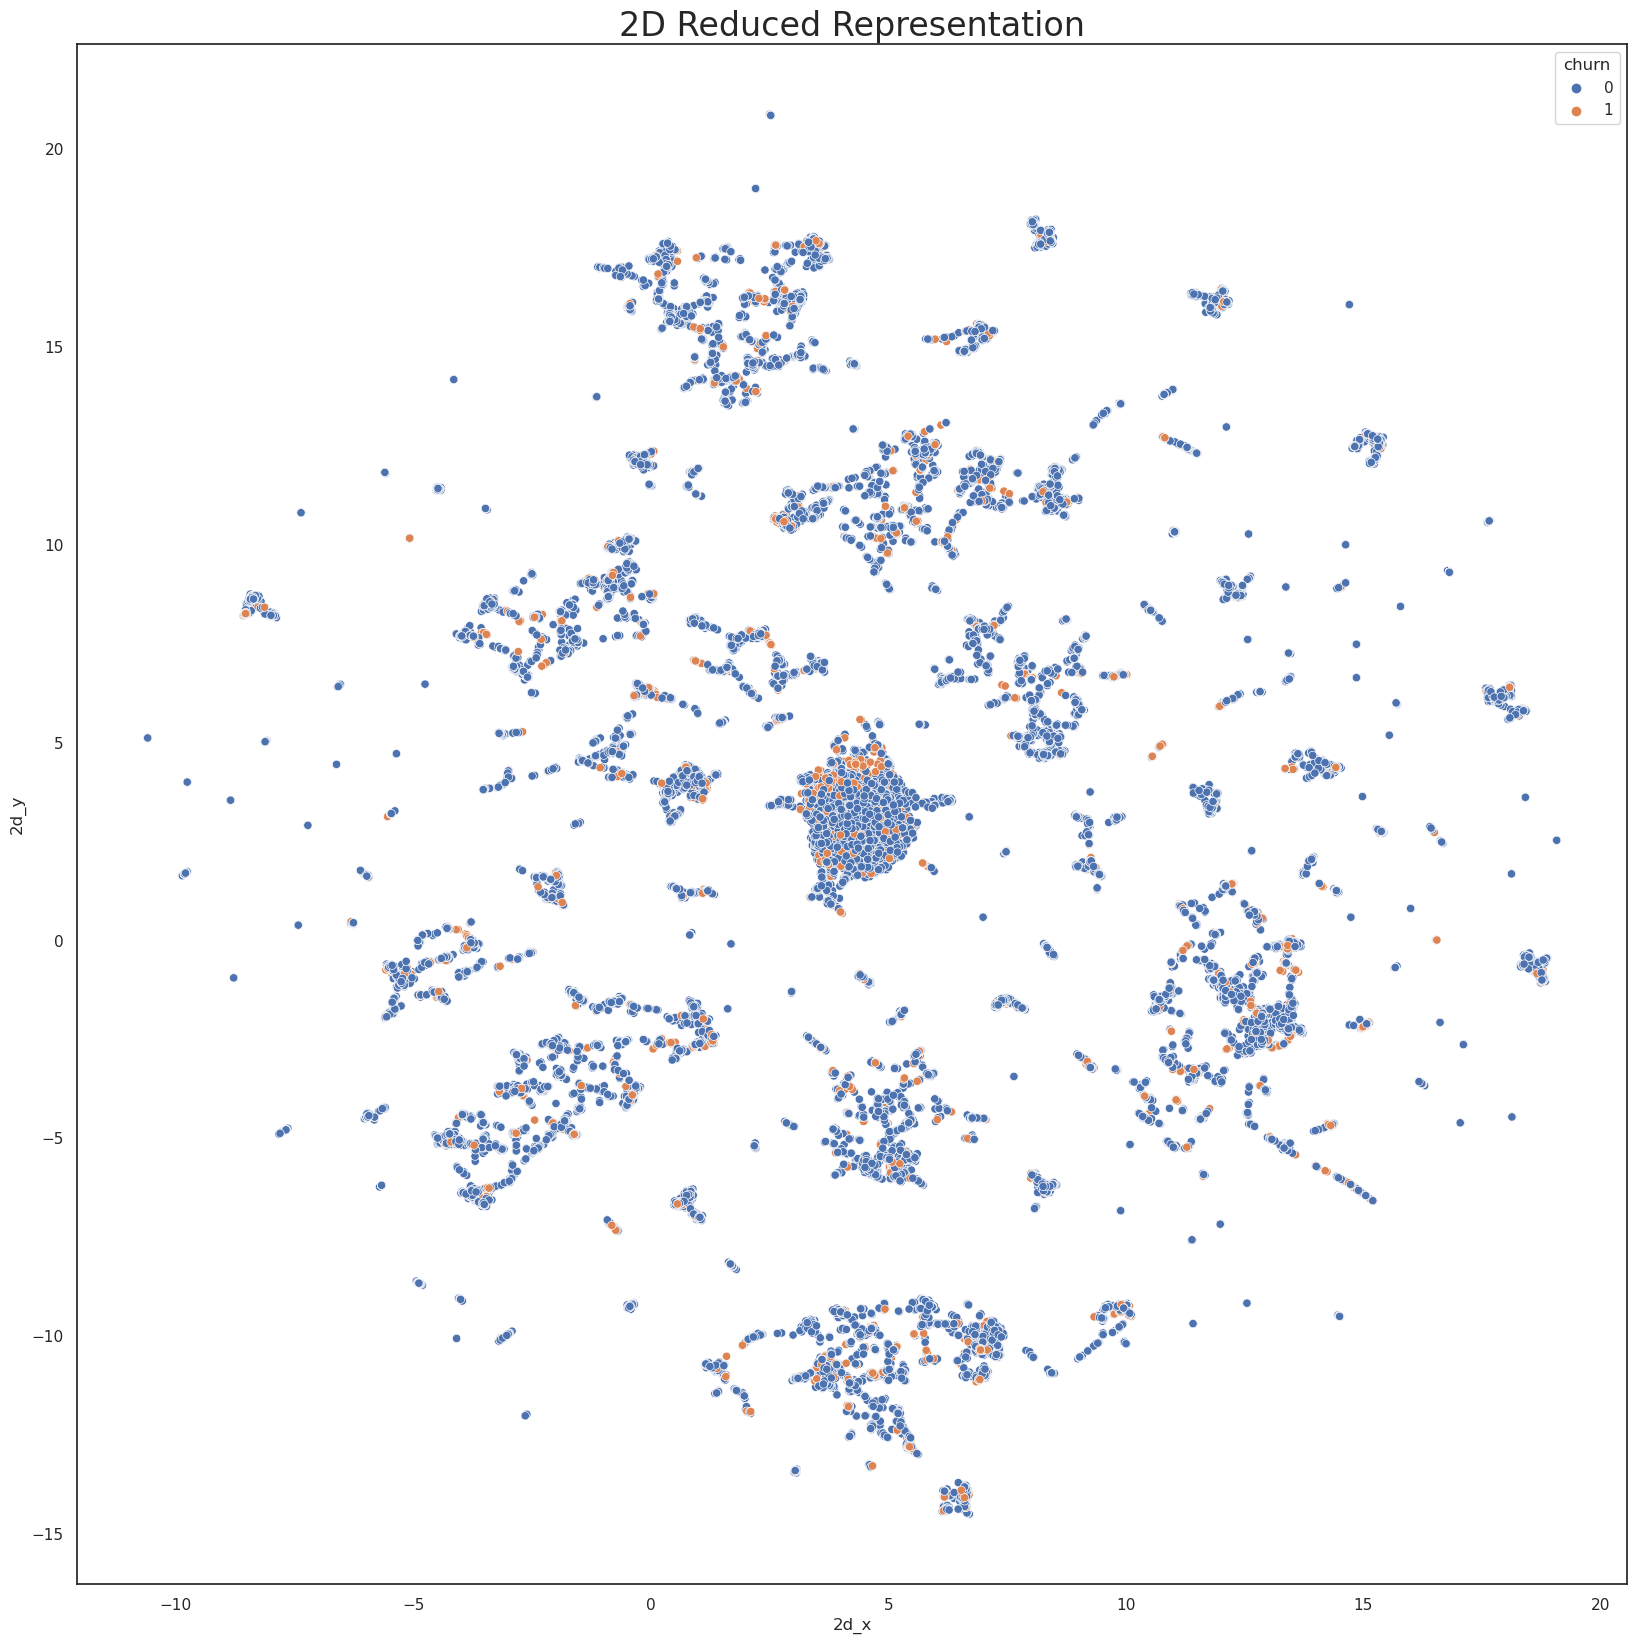

In [18]:
import umap
from category_encoders import LeaveOneOutEncoder

umap_train = train.copy()

features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls'
]

reducer = umap.UMAP(random_state=2023)
reduced_data = reducer.fit_transform(umap_train[features])
umap_train["2d_x"] = reduced_data[:, 0]
umap_train["2d_y"] = reduced_data[:, 1]

sns.set(style='white', context='notebook')

f, ax = plt.subplots(figsize=(20, 20))

_ = sns.scatterplot(data=umap_train, x="2d_x", y="2d_y", hue="churn", ax=ax)
_ = ax.set_title('2D Reduced Representation', fontsize=24)

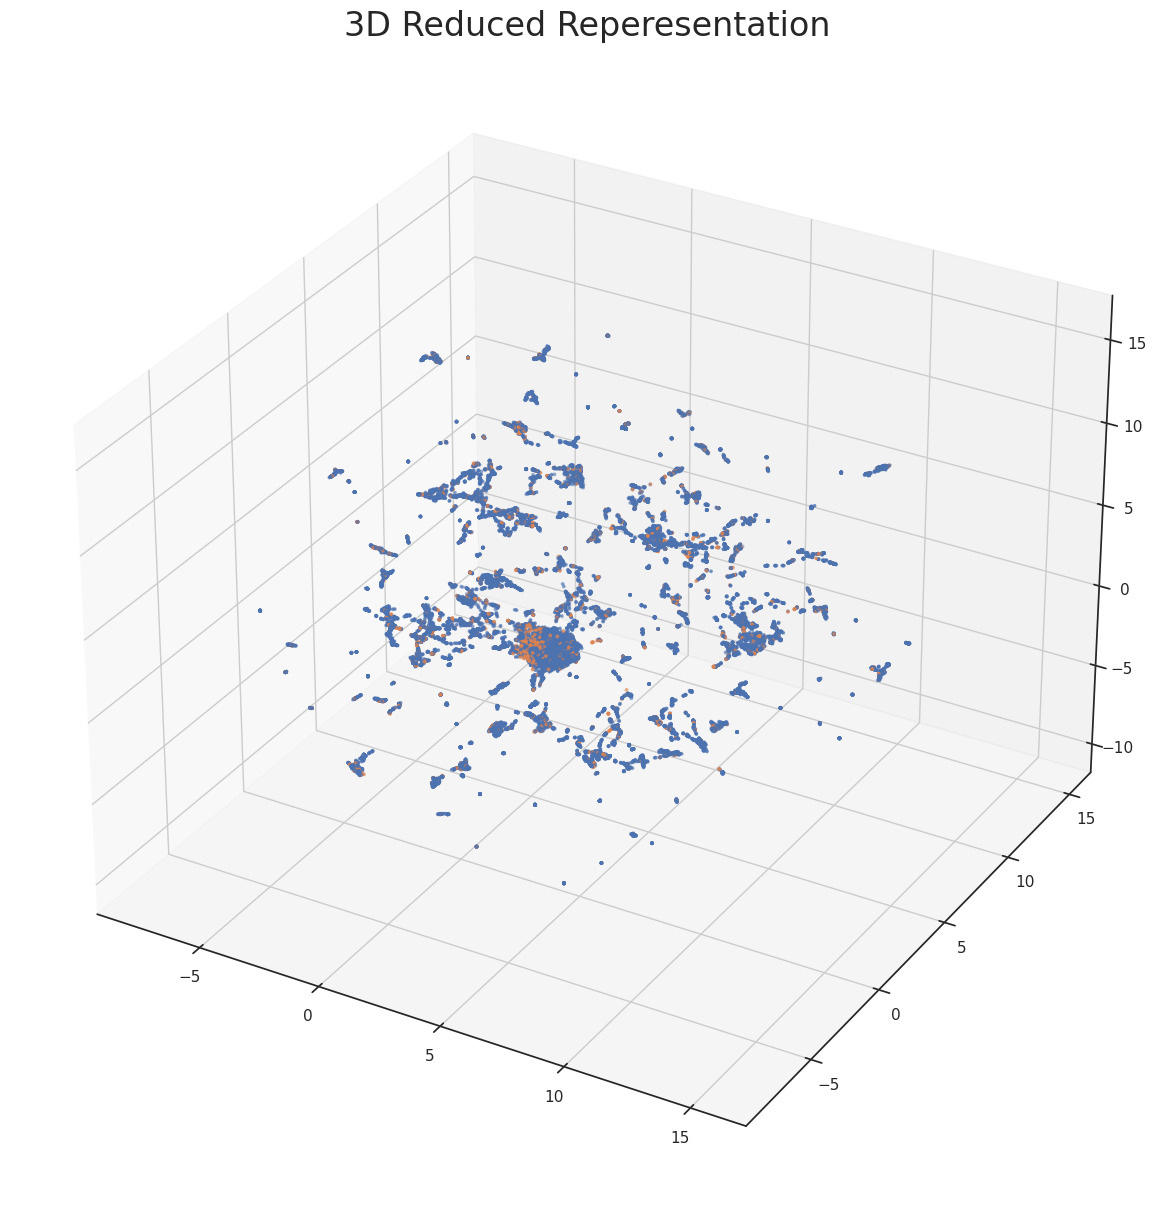

In [19]:
reducer = umap.UMAP(n_components=3, random_state=2023)
reduced_data = reducer.fit_transform(umap_train[features])

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection='3d')

_ = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=[sns.color_palette()[x] for x in train["churn"]], s=3)
_ = plt.title('3D Reduced Reperesentation', fontsize=24)

# Features

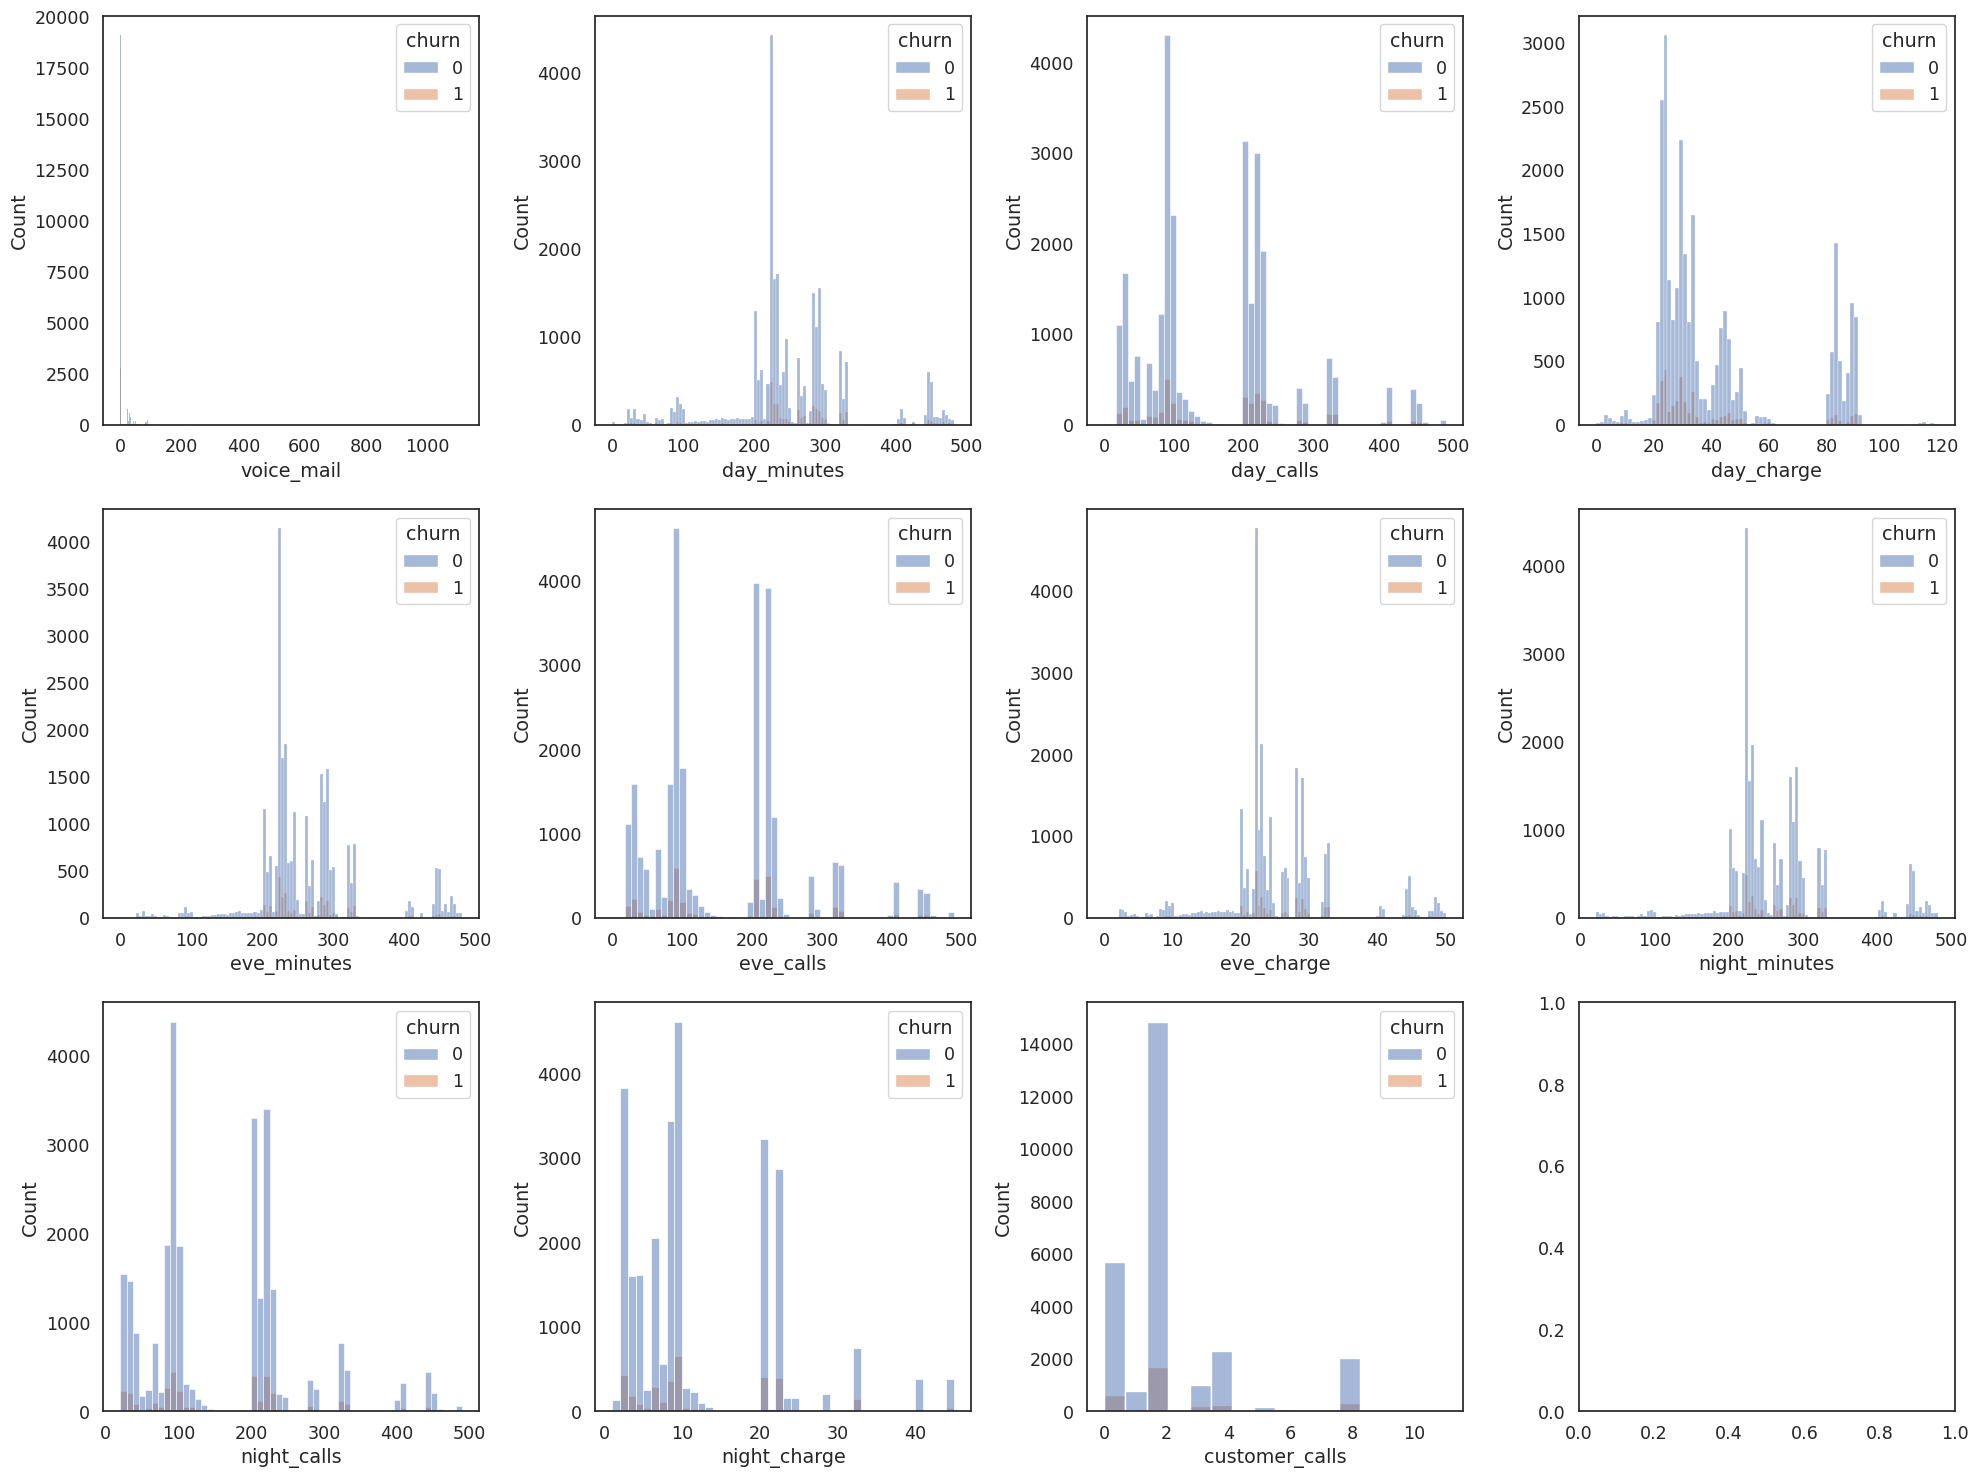

In [26]:
import math
sns.set_context("notebook", font_scale=1.15) #, rc={"font.size":30,"axes.titlesize":20,"axes.labelsize":20}) 

features = [
    'voice_mail', 'day_minutes', 'day_calls', 'day_charge', 'eve_minutes', 'eve_calls',
    'eve_charge', 'night_minutes', 'night_calls', 'night_charge', 'customer_calls'
]

qty = len(features)
ncols = 4
nrows = math.ceil(qty / ncols) 
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 5*nrows))
r, c = 0, 0
for f in features:
    if f == 'avg_price_per_room':
        sns.kdeplot(data=train, x=f, hue=train['churn'], ax=axs[r,c])
        axs[r,c].legend()
#     elif f in features:
#         sns.countplot(data=train, x=f, hue=train['churn'], ax=axs[r,c])
    else:
        sns.histplot(data=train, x=f, hue=train['churn'], ax=axs[r,c])
    c += 1
    if c > ncols-1:
        c = 0
        r += 1
plt.tight_layout()
plt.show()